<a href="https://colab.research.google.com/github/Arish005/ML_Project/blob/main/ML_proejct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python function sum_of_multiples(n) that calculates and returns the sum of all numbers below n that are multiples of 3 or 5. For example, if n = 10, the multiples of 3 or 5 below 10 are 3, 5, 6, and 9, so the function should return 23.

Write a Python function count_vowels(s) that takes a string s as input and returns the count of vowels (a, e, i, o, u) in the string, both lowercase and uppercase.

Write a Python Function greatest_integer(list,value) that takes in a non-descending list and a value, and returns the largest number smaller than that value in the list.

In [ ]:
def sum_of_multiples(n):
    sum = 0
    for i in range(n):
        if i % 3 == 0 or i % 5 == 0:
            sum += i
    return sum


In [ ]:
# Install necessary libraries
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# Define the maze
maze = [
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
]

# Start and end points
start, end = (0, 0), (len(maze)-1, len(maze[0])-1)

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def custom_mutate(individual, indpb=0.2):
    directions = ['U', 'D', 'L', 'R']
    for i in range(len(individual)):
        if random.random() < indpb:
            # Exclude the current direction to ensure mutation changes the gene
            possible_directions = [d for d in directions if d != individual[i]]
            individual[i] = random.choice(possible_directions)
    return individual,

In [ ]:
def evaluate(individual):
    x, y = start
    for move in individual:
        # Move up, down, left, or right while checking boundaries
        if move == 'U': y = max(0, y - 1)
        elif move == 'D': y = min(len(maze) - 1, y + 1)
        elif move == 'L': x = max(0, x - 1)
        elif move == 'R': x = min(len(maze[0]) - 1, x + 1)

        # Check if the current position is the end goal
        if (x, y) == end:
            return (0,)  # Perfect score since we reached the end

        # Check if the current position is a wall
        if maze[y][x] == 1:
            break

    # Return the Manhattan distance to the end point as the score
    return (abs(end[0] - x) + abs(end[1] - y),)

In [ ]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", custom_mutate, indpb=0.2)

In [ ]:
def custom_mutate(individual, indpb=0.2):
    directions = ['U', 'D', 'L', 'R']
    for i in range(len(individual)):
        if random.random() < indpb:
            # Exclude the current direction to ensure mutation changes the gene
            possible_directions = [d for d in directions if d != individual[i]]
            individual[i] = random.choice(possible_directions)
    return individual,

In [ ]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", custom_mutate, indpb=0.2)

In [ ]:
# Function to visualize the maze and path
def plot_path(individual):
    x, y = start
    plt.plot(x, y, "go")  # start point
    for move in individual:
        # Attempt the move
        next_x, next_y = x, y
        if move == 'U': next_y = max(0, y - 1)
        elif move == 'D': next_y = min(len(maze) - 1, y + 1)
        elif move == 'L': next_x = max(0, x - 1)
        elif move == 'R': next_x = min(len(maze[0]) - 1, x + 1)

        # Check for wall collision before plotting the move
        if maze[next_y][next_x] == 1 or (next_x, next_y) == end: break
        # No collision, so make the move and plot it
        x, y = next_x, next_y
        plt.plot(x, y, "bo")

    plt.plot(end[0], end[1], "ro")  # end point
    plt.imshow(maze, cmap="binary")
    plt.show()

In [ ]:
# Run the genetic algorithm
def run_ga(generations=2000, pop_size=50):
    pop = toolbox.population(n=pop_size)
    best_individuals = []
    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        top_individual = tools.selBest(pop, k=1)[0]
        best_individuals.append(top_individual)

        if gen in [2, 10, 50, 100, 500] or gen == generations - 1:
            print(f"Generation {gen}:")
            plot_path(top_individual)

Generation 2:


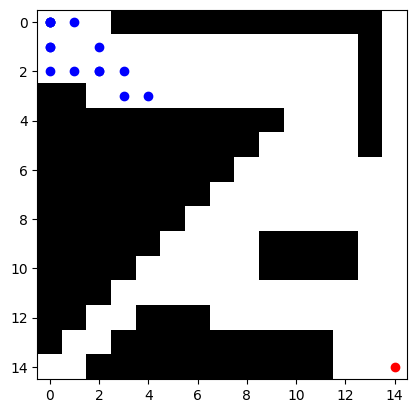

Generation 10:


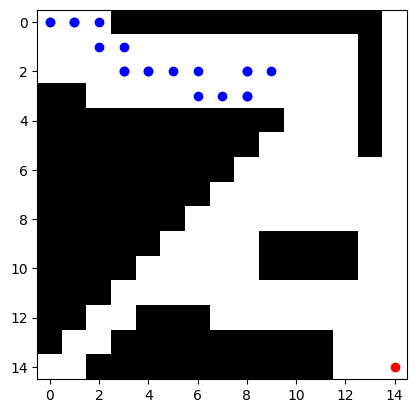

Generation 50:


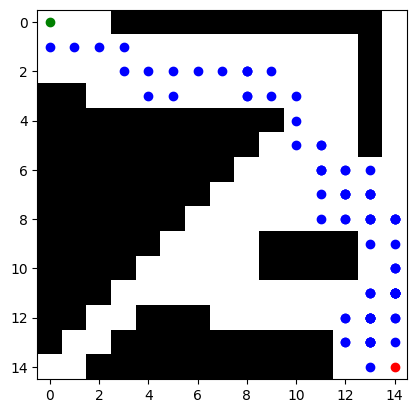

Generation 100:


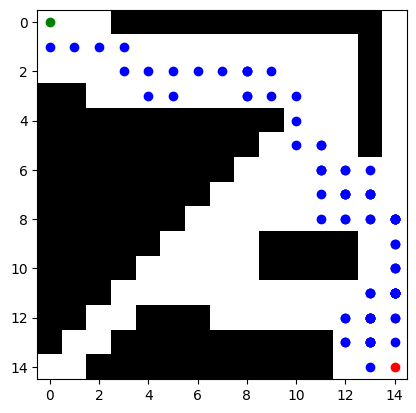

Generation 500:


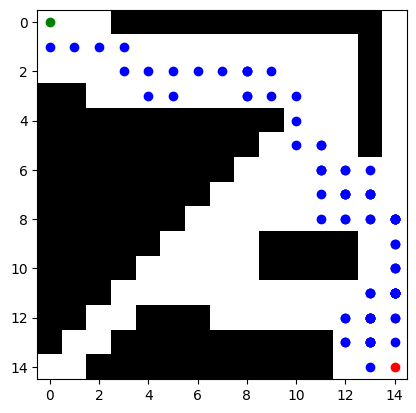

Generation 1999:


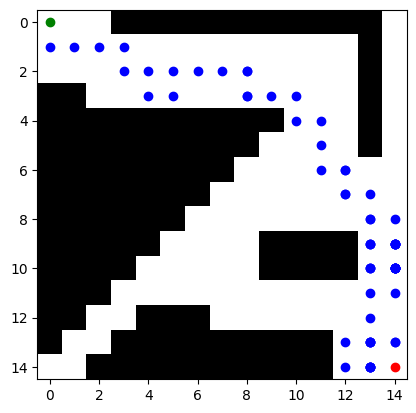

In [ ]:
run_ga()

TASK

In [16]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap

In [17]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [18]:


num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]

depot = (50, 50)


num_vehicles = 3

print("Number of locations:", num_locations)
print("Locations:", locations)
print("Depot:", depot)
print("Number of vehicles:", num_vehicles)


Number of locations: 10
Locations: [(84, 42), (48, 34), (9, 96), (43, 81), (10, 3), (10, 34), (61, 5), (64, 75), (86, 34), (80, 47)]
Depot: (50, 50)
Number of vehicles: 3


In [19]:
from deap import base, creator, tools
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_location", random.randint, 0, num_locations - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_location, n=num_locations)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)



In [20]:
from deap import tools


toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(num_locations), num_locations)

toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)


toolbox.register("population", tools.initRepeat, list, toolbox.individual)



In [21]:
def evalVRP(individual):

    total_distance = 0
    route_lengths = []

    current_route = []
    for location in individual:
        current_route.append(location)

        if len(current_route) > 1:
            for i in range(len(current_route) - 1):
                total_distance += distance(current_route[i], current_route[i + 1])

        if some_route_ending_condition:
            route_lengths.append(calculate_route_length(current_route))
            current_route = []

    std_dev = np.std(route_lengths)

    return total_distance, std_dev


In [22]:
pip install deap

In [23]:
pip install toolbox

In [24]:
from deap import tools
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [25]:
pip install --upgrade pip


In [26]:
from deap import base, tools

toolbox = base.Toolbox()
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [27]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [34]:


# Define the fitness evaluation function
def evaluate(individual):
    return sum(individual),  # Example: sum of individual attributes

toolbox.register("evaluate", evaluate)

# Plot the optimal route (dummy implementation)
def plot_routes(individual, title):
    print(f"{title}: {individual}")

# Main function to run the genetic algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=300, stats=stats, halloffame=hof, verbose=True)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")

    return pop, stats, hof

if __name__ == "__main__":
    # Call the main function
    pop, stats, hof = main()

    # Print the best individual and its fitness
    print("\nBest Individual:")
    print(hof[0])
    print("Fitness:", hof[0].fitness.values)

    # Print some statistics from the final population
    print("\nAlgorithm Statistics:")
    print("Average Fitness:", stats.compile(pop)['avg'])
    print("Minimum Fitness:", stats.compile(pop)['min'])


gen	nevals	avg    	min    
0  	300   	5.04308	2.70518
1  	230   	4.154  	-1.28441
2  	230   	3.34796	-5.66064
3  	231   	2.23521	-5.66064
4  	216   	0.954773	-5.7737 
5  	227   	-0.733299	-6.54717
6  	220   	-2.67965 	-9.27916
7  	218   	-4.4339  	-11.2051
8  	227   	-6.05939 	-13.0625
9  	229   	-8.10784 	-16.7813
10 	238   	-10.1344 	-17.8202
11 	232   	-12.011  	-18.8584
12 	232   	-13.9715 	-20.7768
13 	209   	-15.8533 	-23.2734
14 	215   	-17.7688 	-24.809 
15 	225   	-20.1037 	-29.3281
16 	236   	-22.29   	-30.3223
17 	233   	-24.3416 	-32.0589
18 	234   	-26.6121 	-33.5068
19 	225   	-28.7557 	-35.8169
20 	233   	-30.6959 	-38.266 
21 	219   	-32.6465 	-38.9059
22 	237   	-34.9584 	-40.148 
23 	226   	-36.9488 	-42.354 
24 	226   	-38.5785 	-43.8249
25 	216   	-40.3099 	-45.0422
26 	220   	-41.7987 	-48.097 
27 	228   	-43.4754 	-49.8038
28 	220   	-45.3498 	-52.7   
29 	235   	-47.1382 	-54.225 
30 	245   	-49.1132 	-59.4743
31 	238   	-51.1991 	-63.5622
32 	246   	-53.2358 	-6